# Определение перспективного тарифа для телеком-компании

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
sns.set(style="darkgrid")
pd.options.display.float_format = '{:,.2f}'.format

## общая информация

In [2]:
calls    = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs  = pd.read_csv('/datasets/tariffs.csv')
users    = pd.read_csv('/datasets/users.csv')

In [3]:
users.info()
users.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
count,500.00,500.00,38,500,500,500,500,500
unique,NaN,NaN,33,76,246,419,270,2
top,NaN,NaN,2018-12-03,Москва,Радим,Андреенко,2018-05-28,smart
freq,NaN,NaN,2,99,6,5,8,351
mean,"1,249.50",46.59,NaN,NaN,NaN,NaN,NaN,NaN
std,144.48,16.67,NaN,NaN,NaN,NaN,NaN,NaN
min,"1,000.00",18.00,NaN,NaN,NaN,NaN,NaN,NaN
25%,"1,124.75",32.00,NaN,NaN,NaN,NaN,NaN,NaN
50%,"1,249.50",46.00,NaN,NaN,NaN,NaN,NaN,NaN
75%,"1,374.25",62.00,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
calls.info()
calls.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
count,202607,202607,"202,607.00","202,607.00"
unique,202607,365,NaN,NaN
top,1000_0,2018-12-31,NaN,NaN
freq,1,1435,NaN,NaN
mean,NaN,NaN,6.76,"1,253.94"
std,NaN,NaN,5.84,144.72
min,NaN,NaN,0.00,"1,000.00"
25%,NaN,NaN,1.30,"1,126.00"
50%,NaN,NaN,6.00,"1,260.00"
75%,NaN,NaN,10.70,"1,379.00"


In [5]:
messages.info()
messages.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
count,123036,123036,"123,036.00"
unique,123036,364,NaN
top,1000_0,2018-12-31,NaN
freq,1,859,NaN
mean,NaN,NaN,"1,256.99"
std,NaN,NaN,143.52
min,NaN,NaN,"1,000.00"
25%,NaN,NaN,"1,134.00"
50%,NaN,NaN,"1,271.00"
75%,NaN,NaN,"1,381.00"


In [6]:
internet.info()
internet.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
count,"149,396.00",149396,"149,396.00",149396,"149,396.00"
unique,NaN,149396,NaN,365,NaN
top,NaN,1000_0,NaN,2018-12-31,NaN
freq,NaN,1,NaN,1057,NaN
mean,"74,697.50",NaN,370.19,NaN,"1,252.10"
std,"43,127.05",NaN,278.30,NaN,144.05
min,0.00,NaN,0.00,NaN,"1,000.00"
25%,"37,348.75",NaN,138.19,NaN,"1,130.00"
50%,"74,697.50",NaN,348.01,NaN,"1,251.00"
75%,"112,046.25",NaN,559.55,NaN,"1,380.00"


In [7]:
tariffs.info()
tariffs.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
count,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,smart
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,525.00,"23,040.00","1,750.00","1,250.00",175.00,2.00,2.00,NaN
std,671.75,"10,861.16","1,767.77",989.95,35.36,1.41,1.41,NaN
min,50.00,"15,360.00",500.00,550.00,150.00,1.00,1.00,NaN
25%,287.50,"19,200.00","1,125.00",900.00,162.50,1.50,1.50,NaN
50%,525.00,"23,040.00","1,750.00","1,250.00",175.00,2.00,2.00,NaN
75%,762.50,"26,880.00","2,375.00","1,600.00",187.50,2.50,2.50,NaN


In [8]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


## Подготовка данных

### Приведение типов данных

<div style="border:solid gray 2.0px; padding: 10px"> 
    
Приводим типы данных: 
    
 - строки меняем на даты
    
 - при работе с числами часто видим, что Pandas некоторым столбцам присвоил избыточные типы данных, которые занимают лишнее место в памяти. Такие столбцы тоже приобразуем в соответствующий тип

</div>

In [10]:
users['churn_date']      = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date']        = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['age']             = users['age'].astype('uint8')

calls['call_date']       = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['duration']        = calls['duration'].astype('float16')

messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['mb_used']      = internet['mb_used'].astype('float16')


tariffs['rub_monthly_fee']    = tariffs['rub_monthly_fee'].astype('uint16')
tariffs['messages_included']  = tariffs['messages_included'].astype('uint16')
tariffs['minutes_included']   = tariffs['minutes_included'].astype('uint16')
tariffs['rub_monthly_fee']    = tariffs['rub_monthly_fee'].astype('uint16')
tariffs['rub_per_gb']         = tariffs['rub_per_gb'].astype('uint8')
tariffs['rub_per_message']    = tariffs['rub_per_message'].astype('uint8')
tariffs['rub_per_minute']     = tariffs['rub_per_minute'].astype('uint8')


In [11]:
calls.dtypes

id                   object
call_date    datetime64[ns]
duration            float16
user_id               int64
dtype: object

In [12]:
internet.dtypes

Unnamed: 0               int64
id                      object
mb_used                float16
session_date    datetime64[ns]
user_id                  int64
dtype: object

In [13]:
messages.dtypes

id                      object
message_date    datetime64[ns]
user_id                  int64
dtype: object

In [14]:
tariffs.dtypes

messages_included        uint16
mb_per_month_included     int64
minutes_included         uint16
rub_monthly_fee          uint16
rub_per_gb                uint8
rub_per_message           uint8
rub_per_minute            uint8
tariff_name              object
dtype: object

In [15]:
users.dtypes

user_id                int64
age                    uint8
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object

### Ошибки в данных

<div style="border:solid gray 2.0px; padding: 10px"> 
    
В датафрейме internet мы видим столбец **Unnamed: 0**, полностью повторяющий индекс.

Удалим его 
    
</div>

In [16]:
internet[['Unnamed: 0']]

,Unnamed: 0
0,0
1,1
2,2
3,3
4,4
...,...
149391,149391
149392,149392
149393,149393
149394,149394


In [17]:
internet = internet.drop('Unnamed: 0', 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


### Расчет помесячных данных

<div style="border:solid gray 2.0px; padding: 10px"> 
    
Прежде, чем считать поменячные данные, вспомним, что каждый звонок в Мегалайне  округляется до минут в большую сторону.

Поэтому насчитаем дополнительную колонку в датафрейме Calls, поторая будет показывать количество потраченных минут

    
</div>

In [18]:
calls['duration_round']  = calls['duration'].apply(np.ceil)
calls['duration_round']  = calls['duration_round'].astype('uint16')

#### Расчет помесячных данных по звонкам

In [19]:
calls['date_month'] = calls['call_date'].values.astype('datetime64[M]')

In [20]:
calls.dtypes

id                        object
call_date         datetime64[ns]
duration                 float16
user_id                    int64
duration_round            uint16
date_month        datetime64[ns]
dtype: object

In [21]:
calls.head(5)

,id,call_date,duration,user_id,duration_round,date_month
0,1000_0,2018-07-25,0.00,1000,0,2018-07-01
1,1000_1,2018-08-17,0.00,1000,0,2018-08-01
2,1000_2,2018-06-11,2.85,1000,3,2018-06-01
3,1000_3,2018-09-21,13.80,1000,14,2018-09-01
4,1000_4,2018-12-15,5.18,1000,6,2018-12-01


In [22]:
calls_users_month = calls \
    .groupby(['user_id', 'date_month']) \
    .agg(
        {'duration_round': ['count', 'sum']
        }) \
    .reset_index()

calls_users_month.columns = ['user_id', 'date_month', 'duration_count', 'duration_sum']
calls_users_month.head()

,user_id,date_month,duration_count,duration_sum
0,1000,2018-05-01,22,159
1,1000,2018-06-01,43,172
2,1000,2018-07-01,47,340
3,1000,2018-08-01,52,408
4,1000,2018-09-01,58,466


#### Расчет помесячных данных по сообщениям

In [23]:
messages['date_month'] = messages['message_date'].values.astype('datetime64[M]')

In [24]:
messages_users_month = messages \
    .groupby(['user_id', 'date_month']) \
    .agg(
        {'message_date': ['count']
        }) \
    .reset_index()

messages_users_month.columns = ['user_id', 'date_month', 'message_count']
messages_users_month.head()

,user_id,date_month,message_count
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57


#### Расчет объема израсходованного трафика по месяцам

In [25]:
internet['date_month'] = internet['session_date'].values.astype('datetime64[M]')

In [26]:
internet_users_month = internet \
    .groupby(['user_id', 'date_month']) \
    .agg(
        {'mb_used': ['sum']
        }) \
    .reset_index()

internet_users_month.columns = ['user_id', 'date_month', 'mb_used_sum']
internet_users_month.head()

,user_id,date_month,mb_used_sum
0,1000,2018-05-01,"2,254.00"
1,1000,2018-06-01,"23,232.00"
2,1000,2018-07-01,"14,008.00"
3,1000,2018-08-01,"14,056.00"
4,1000,2018-09-01,"14,568.00"


#### Расчет помесячной выручки

<div style="border:solid gray 2.0px; padding: 10px"> 
    
Объединим данные
    
</div>

In [27]:
users_month = pd.merge(calls_users_month, messages_users_month, on =['user_id', 'date_month'], how='outer')
users_month = pd.merge(users_month, internet_users_month, on =['user_id', 'date_month'], how='outer')

users_month = pd.merge(users_month, users, on =['user_id'], how='outer')

tariffs = tariffs.rename({'tariff_name': 'tariff'}, axis='columns')
users_month = pd.merge(users_month, tariffs, on =['tariff'], how='outer')
users_month.head(5)


,user_id,date_month,duration_count,duration_sum,message_count,mb_used_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,2018-05-01,22.00,159.00,22.00,"2,254.00",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,2018-06-01,43.00,172.00,60.00,"23,232.00",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,2018-07-01,47.00,340.00,75.00,"14,008.00",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,2018-08-01,52.00,408.00,81.00,"14,056.00",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,2018-09-01,58.00,466.00,57.00,"14,568.00",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [28]:
users_month.isna().sum().pipe(lambda x: x[x!=0])

date_month           2
duration_count      42
duration_sum        42
message_count      499
mb_used_sum         13
churn_date        3027
dtype: int64

In [29]:
users_month.query('date_month.isna()')

,user_id,date_month,duration_count,duration_sum,message_count,mb_used_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
985,1128,NaT,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1
3215,1371,NaT,NaN,NaN,NaN,NaN,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,50,15360,500,550,200,3,3


In [30]:
users_month = users_month.query('date_month.notna()')

for col in ['duration_count', 'duration_sum', 'message_count', 'mb_used_sum']:
    users_month[col] = users_month[col].fillna(0)

In [31]:
users_month.shape, users_month['user_id'].nunique()

((3214, 20), 498)

In [32]:
users_month.isna().sum().pipe(lambda x: x[x!=0])

churn_date    3027
dtype: int64

<div style="border:solid gray 2.0px; padding: 10px"> 
    
Посчитаем перерасход по количеству сообщений, минутам, и интернет трафику.
    
Если перерасход отрицательный, это значит, что пользователь не использовал бесплатный лимит. Отрицательные значения меняем на 0.
    
Перерасход по трафику округляем до гигабайт в большую сторону в соответствии с политикой Мегалайна
    
</div>

In [33]:

users_month['messages_over'] = users_month['message_count'] - users_month['messages_included']
users_month['messages_over'] = users_month['messages_over'].where(users_month['messages_over'] >= 0, 0)

users_month['minutes_over'] = users_month['duration_sum'].astype('int16') - users_month['minutes_included'].astype('int16')
users_month['minutes_over'] = users_month['minutes_over'].where(users_month['minutes_over'] >= 0, 0)

users_month['mb_per_month_over'] = users_month['mb_used_sum'].astype('float16') - users_month['mb_per_month_included'].astype('float16')
users_month['mb_per_month_over'] = users_month['mb_per_month_over'].where(users_month['mb_per_month_over'] >= 0, 0)

users_month['gb_per_month_over'] = (users_month['mb_per_month_over'] / 1024).apply(np.ceil)

<div style="border:solid gray 2.0px; padding: 10px"> 
    
Посчитаем помесячную выручку для каждого пользователя как сумму абонентской платы и платы за перерасход
    
</div>

In [34]:
users_month['rub_monthly'] = \
              users_month['messages_over']    * users_month['rub_per_message'] + \
              users_month['minutes_over']     * users_month['rub_per_minute']  + \
              users_month['gb_per_month_over']* users_month['rub_per_gb']      + \
              users_month['rub_monthly_fee']

<div style="border:solid gray 2.0px; padding: 10px"> 
    
!!! Вот тут закрадываются сомнения, и вот с чем они связаны:

    
Тут не учтены издержки компании за предоставление того или иного кол-ва ресурсов: сообщений, смс и трафика.
Причем эти издержки, скорее всего, не линейны: чем больше предоставляется ресурса, тем дешевле стоит его единица.
    
Интуитивно понятно, что более дорогой тариф будет приносить больше, если не учитывать издержки компании.
А если их учитывать, то все не так очевидно.
    
    
</div>

In [35]:
users_month.query('minutes_over>0')['tariff'].value_counts() / users_month['tariff'].value_counts() * 100
#users_month.sort_values(by='rub_monthly', ascending=False).head(5)

smart   33.83
ultra     NaN
Name: tariff, dtype: float64

In [36]:
users_month.query('messages_over>0')['tariff'].value_counts() / users_month['tariff'].value_counts() * 100

smart   25.30
ultra     NaN
Name: tariff, dtype: float64

In [37]:
users_month.query('gb_per_month_over>0')['tariff'].value_counts() / users_month['tariff'].value_counts() * 100

smart   58.41
ultra   13.60
Name: tariff, dtype: float64

<div style="border:solid blue 2.0px; padding: 10px"> 
    
Интересно, что в нашей выборке превышение по сообщениям и минутам звонков наблюдается только в тарифе smart.
    
Превышение по интернет трафику в большинстве случаем мы тоже видим в тарифе smart.
    
Процент пользователей в тарифе **smart**, которые превышают допустимый лимит без переплат:
 - по звонкам: 33%
 - по сообщениям: 25%
 - по интернет трафику: 58%

Процент пользователей в тарифе **ultra**, которые превышают допустимый лимит без переплат:
 - по звонкам: 0%
 - по сообщениям: 0%
 - по интернет трафику: 13%
    
</div>

## Анализ данных

In [38]:
users_month.dtypes

user_id                           int64
date_month               datetime64[ns]
duration_count                  float64
duration_sum                    float64
message_count                   float64
mb_used_sum                     float16
age                               uint8
churn_date               datetime64[ns]
city                             object
first_name                       object
last_name                        object
reg_date                 datetime64[ns]
tariff                           object
messages_included                uint16
mb_per_month_included             int64
minutes_included                 uint16
rub_monthly_fee                  uint16
rub_per_gb                        uint8
rub_per_message                   uint8
rub_per_minute                    uint8
messages_over                   float64
minutes_over                      int16
mb_per_month_over               float16
gb_per_month_over               float32
rub_monthly                     float64


In [39]:
users_month['tariff'].value_counts()

smart    2229
ultra     985
Name: tariff, dtype: int64

### Статистики

<div style="border:solid gray 2.0px; padding: 10px"> 
    
Посчитаем основные статистики, харакретизующие распределения кол-ва звонков, сообщений и объем интернет трафика в разрезе тарифов
    
</div>

In [40]:
users_month['mb_used_sum'].value_counts()

0.00         13
17,280.00    10
20,896.00    10
19,456.00     9
18,416.00     8
             ..
9,312.00      1
9,968.00      1
12,880.00     1
5,200.00      1
11,048.00     1
Name: mb_used_sum, Length: 1781, dtype: int64

<div style="border:solid blue 2.0px; padding: 10px"> 
    
Посмотрим, что будет со статистиками при изменении типа данных столбца, на осовании которого они считаются

    
Чтобы не испортить исходные данные, будем создавать временный столбец 'mb_used_sum_temp', а потом его удалим
    
</div>

In [41]:
for mytype in ('float64', 'float32', 'float16', 'int64', 'int32', 'int16'):
    users_month['mb_used_sum_temp']      = users_month['mb_used_sum'].astype(mytype)
    print(mytype, '\n', users_month.groupby('tariff').agg({'mb_used_sum_temp': [np.var, np.std]}).T,'\n')

users_month = users_month.drop('mb_used_sum_temp', 1)

float64 
 tariff                       smart          ultra
mb_used_sum_temp var 34,462,299.04 101,747,653.25
                 std      5,870.46      10,087.00 

float32 
 tariff                       smart          ultra
mb_used_sum_temp var 34,462,300.00 101,747,656.00
                 std      5,870.46      10,087.00 

float16 
 tariff                  smart     ultra
mb_used_sum_temp var      inf       inf
                 std 5,870.46 10,087.00 

int64 
 tariff                       smart          ultra
mb_used_sum_temp var 34,462,339.55 101,747,729.72
                 std      5,870.46      10,087.01 

int32 
 tariff                       smart          ultra
mb_used_sum_temp var 34,462,339.55 101,747,729.72
                 std      5,870.46      10,087.01 

int16 
 tariff                       smart          ultra
mb_used_sum_temp var 40,542,318.88 253,074,271.51
                 std      6,367.29      15,908.31 



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


<div style="border:solid blue 2.0px; padding: 10px"> 
    
Удивительно, но только при float16 что-то идет не так.

    
Хотя, если посмотреть документацию: https://pyprog.pro/statistics_functions/var.html, все становится понятным: "для чисел с плавающей точкой тип данных будет совпадать с типом данных входного массива"

    
Т.е. если данные типа float, то значению статистики от присваивает такой же тип. А т.к. float16 не достаточно для таких больших значений нашем случае, он присваивает inf

    
</div>

In [42]:
users_month['mb_used_sum']      = users_month['mb_used_sum'].astype('float32')

users_month \
    .groupby('tariff') \
    .agg(
        {'duration_sum': [np.mean, np.median, np.var, np.std],
         'message_count': [np.mean, np.median, np.var, np.std],
         'mb_used_sum': [np.mean, np.median, np.var, np.std]
        }).T

tariff                       smart          ultra
duration_sum  mean          417.93         526.62
              median        422.00         518.00
              var        36,219.32     100,873.63
              std           190.31         317.61
message_count mean           33.38          49.36
              median         28.00          38.00
              var           796.81       2,285.27
              std            28.23          47.80
mb_used_sum   mean       16,208.26      19,468.89
              median     16,512.00      19,312.00
              var    34,462,300.00 101,747,656.00
              std         5,870.46      10,087.00

<div style="border:solid gray 2.0px; padding: 10px"> 
    
Мы видим, что разброс значений в тарифе ultra выше. Это не увивительно, ведь в этом тарифе намного больший объем опций идет бесплатно. И его пользователи не думают о перерасходе. 
    
</div>

### Распределения

In [43]:
smart = users_month.query("tariff=='smart'")
ultra = users_month.query("tariff=='ultra'")

<div style="border:solid gray 2.0px; padding: 10px"> 
    
1. Построим гистограммы распределений в разрезе по тарифам:
    - суммарной длительности разговоров
    - количества сообщений 
    - объема интернет трафика 

    где:
    - <span style="color: blue">синим </span> будет отмечено распределение тарифа smart
    - <span style="color: red">красным </span> будет отмечено распределение тарифа ultra

   На эти гистограммы нанесем вертикальные линии, коотрые будут обозначать бесплатный лимит ресурса: синюю линию для тарифа smart, красную для тарифа ultra
    
    
2. Построим график "ящик с усами" для еще более наглядной визуализации распределений
    
</div>

#### Количество минут разговора

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


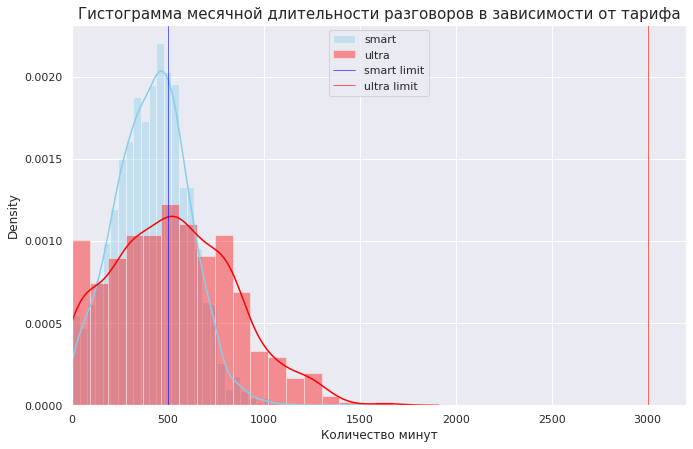

In [44]:
plt.subplots(figsize = (11,7))
sns.distplot(smart['duration_sum'], color="skyblue", label="smart", kde=True)
sns.distplot(ultra['duration_sum'], color="red"    , label="ultra", kde=True)
plt.xlim(0, 3200)
plt.title('Гистограмма месячной длительности разговоров в зависимости от тарифа', fontsize = 15);
plt.xlabel("Количество минут", fontsize = 12)
plt.axvline(tariffs.query("tariff=='smart'")['minutes_included'].max(), color='blue', linewidth=0.6, label="smart limit")
plt.axvline(tariffs.query("tariff=='ultra'")['minutes_included'].max(), color='red', linewidth=0.6, label="ultra limit")
plt.legend();

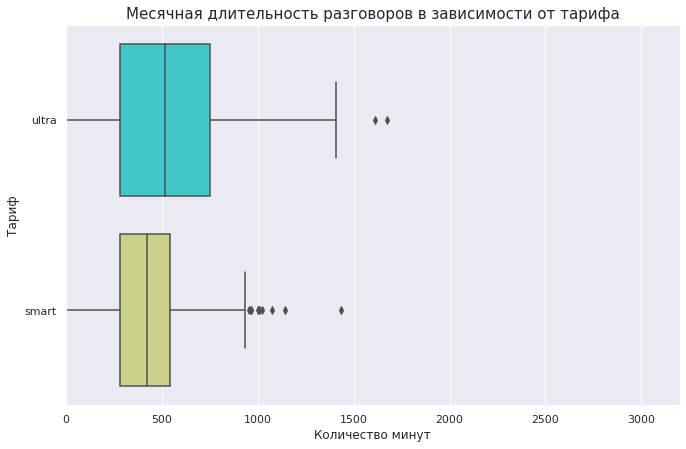

In [45]:
plt.subplots(figsize = (11,7))
sns.boxplot(x="duration_sum", y="tariff", data=users_month, palette='rainbow');
plt.xlim(0, 3200)
plt.title('Месячная длительность разговоров в зависимости от тарифа', fontsize = 15);
plt.xlabel("Количество минут", fontsize = 12)
plt.ylabel("Тариф", fontsize = 12);

#### Количество сообщений

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


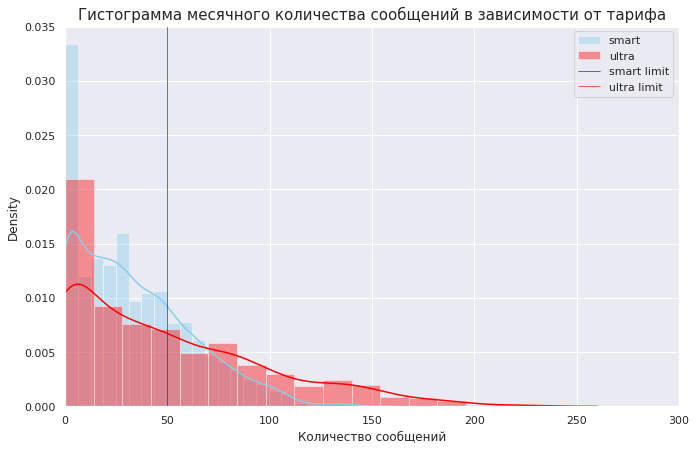

In [46]:
plt.subplots(figsize = (11,7))
sns.distplot(smart['message_count'], color="skyblue", label="smart", kde=True)
sns.distplot(ultra['message_count'], color="red"    , label="ultra", kde=True)
plt.xlim(0, 300)
plt.title('Гистограмма месячного количества сообщений в зависимости от тарифа', fontsize = 15);
plt.xlabel("Количество сообщений", fontsize = 12)
plt.axvline(tariffs.query("tariff=='smart'")['messages_included'].max(), color='blue', linewidth=0.6, label="smart limit")
plt.axvline(tariffs.query("tariff=='ultra'")['messages_included'].max(), color='red', linewidth=0.6, label="ultra limit")
plt.legend();

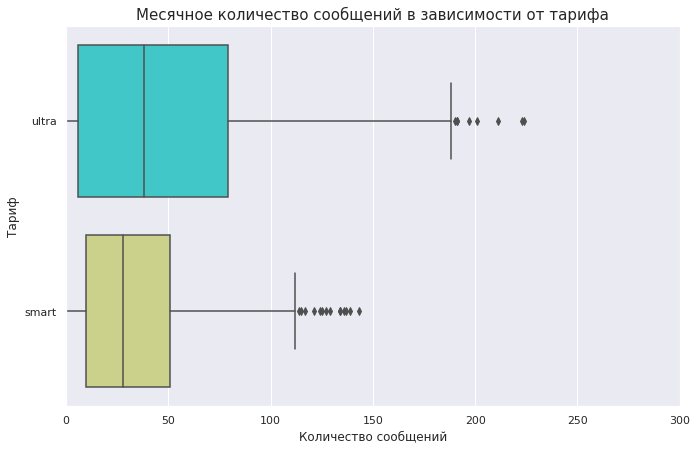

In [47]:
plt.subplots(figsize = (11,7))
sns.boxplot(x="message_count", y="tariff", data=users_month, palette='rainbow');
plt.xlim(0, 300)
plt.title('Месячное количество сообщений в зависимости от тарифа', fontsize = 15);
plt.xlabel("Количество сообщений", fontsize = 12)
plt.ylabel("Тариф", fontsize = 12);

#### Интернет трафик

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


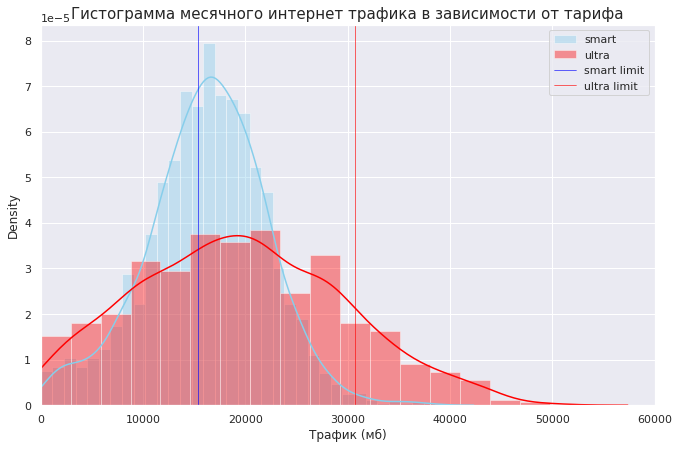

In [48]:
plt.subplots(figsize = (11,7))
sns.distplot(smart['mb_used_sum'], color="skyblue", label="smart", kde=True)
sns.distplot(ultra['mb_used_sum'], color="red"    , label="ultra", kde=True)
plt.xlim(0, 60000)
plt.title('Гистограмма месячного интернет трафика в зависимости от тарифа', fontsize = 15);
plt.xlabel("Трафик (мб)", fontsize = 12)
plt.axvline(tariffs.query("tariff=='smart'")['mb_per_month_included'].max(), color='blue', linewidth=0.6, label="smart limit")
plt.axvline(tariffs.query("tariff=='ultra'")['mb_per_month_included'].max(), color='red', linewidth=0.6, label="ultra limit")
plt.legend();

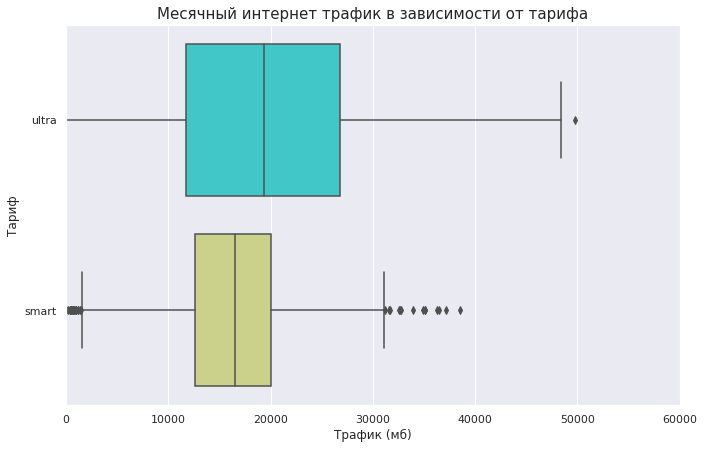

In [49]:
plt.subplots(figsize = (11,7))
sns.boxplot(x="mb_used_sum", y="tariff", data=users_month, palette='rainbow');
plt.xlim(0, 60000)
plt.title('Месячный интернет трафик в зависимости от тарифа', fontsize = 15);
plt.xlabel("Трафик (мб)", fontsize = 12)
plt.ylabel("Тариф", fontsize = 12);

## Проверка гипотез

### Формулировка гипотез

<div style="border:solid gray 2.0px; padding: 10px"> 
    
Сформируем нулевую и альтернативную гипотезы:

**1. выручка тарифов "Ультра" и "Смарт"**
 - **Нулевая гипотеза:** средняя выручка тарифов "Ультра" и "Смарт" не различаются
 - **Альтернативная гипотеза:** средняя выручка тарифов "Ультра" и "Смарт" различаются

<span style="color: white">. </span>

**2. средняя выручка пользователей из Москвы и других регионов:**
 - **Нулевая гипотеза:** средняя выручка пользователей из Москвы не отличается от выручки пользователей других регионов
 - **Альтернативная гипотеза:** средняя выручка пользователей из Москвы и других регионов отличаются

</div>

### Проверка гипотезы о равенстве средней выручки тарифов «Ультра» и «Смарт» 

In [50]:
print("Средняя выручка тарифа smart: " + str(smart['rub_monthly'].mean()))
print("Средняя выручка тарифа ultra: " + str(ultra['rub_monthly'].mean()))

Средняя выручка тарифа smart: 1288.8968147151188
Средняя выручка тарифа ultra: 2070.0


In [51]:
alpha = 0.01

results = st.ttest_ind(
    smart['rub_monthly'], 
    ultra['rub_monthly'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.8621675697159594e-161
Отвергаем нулевую гипотезу


<div style="border:solid gray 2.0px; padding: 10px"> 
    
Отвергаем нулевую гипотезу, т.е. мы убедились, что выручки тарифов не равны.

По среднему значению делаем вывод, что средняя выручка тарифа ultra значимо выше средней выручка тарифа smart

</div>

### Проверка гипотезы о средней выручка пользователей из Москвы и других регионов

In [52]:
moscow = users_month.query("city=='Москва'")
other = users_month.query("city!='Москва'")

In [53]:
alpha = 0.01

results = st.ttest_ind(
    moscow['rub_monthly'], 
    other['rub_monthly'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5464061529277844
Не получилось отвергнуть нулевую гипотезу


<div style="border:solid gray 2.0px; padding: 10px"> 
    
Не можем отвергнуть нулевую гипотезу, т.е. мы не можем утверждать с заданной степенью уверенности, что средние выборок Москвы и других городов отличаются

</div>

## Сравнение выручки тарифов

In [54]:
users_month.head(5)

,user_id,date_month,duration_count,duration_sum,message_count,mb_used_sum,age,churn_date,city,first_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,messages_over,minutes_over,mb_per_month_over,gb_per_month_over,rub_monthly
0,1000,2018-05-01,22.00,159.00,22.00,"2,254.00",52,NaT,Краснодар,Рафаил,...,3000,1950,150,1,1,0.00,0,0.00,0.00,"1,950.00"
1,1000,2018-06-01,43.00,172.00,60.00,"23,232.00",52,NaT,Краснодар,Рафаил,...,3000,1950,150,1,1,0.00,0,0.00,0.00,"1,950.00"
2,1000,2018-07-01,47.00,340.00,75.00,"14,008.00",52,NaT,Краснодар,Рафаил,...,3000,1950,150,1,1,0.00,0,0.00,0.00,"1,950.00"
3,1000,2018-08-01,52.00,408.00,81.00,"14,056.00",52,NaT,Краснодар,Рафаил,...,3000,1950,150,1,1,0.00,0,0.00,0.00,"1,950.00"
4,1000,2018-09-01,58.00,466.00,57.00,"14,568.00",52,NaT,Краснодар,Рафаил,...,3000,1950,150,1,1,0.00,0,0.00,0.00,"1,950.00"


In [55]:
users_month.groupby('tariff').agg({'rub_monthly': 'sum'})

,rub_monthly
tariff,
smart,"2,872,951.00"
ultra,"2,038,950.00"


<div style="border:solid blue 2.0px; padding: 10px"> 
    
И побеждает боец в синем углу ринга: smart. Он берет большинством

</div>

## Общий вывод

<div style="border:solid blue 2.0px; padding: 10px"> 
    
**1. Сравнение тарифов ultra и smart**
    
 - При прямой проверке "в лоб", мы получаем, что тариф ultra приносит больше выручки, чем тариф smart. Это было ожидаемо, ведь тариф ultra дороже в целом.
    
 - С другой стороны, есть издержки компании Мегалайн, которая тратит собственные деньги на предоставление того или иного количества ресурсов пользователям. Скорее всего, эти издержки не линейны. Мы не можем принять, что (условно) одна минута стоит 20 копеек для Мегалайна. Очень жаль, что нет этих данных.
    
 - С третьей стороны, по данным, мы видели, что пользователи тарифа smart часто не укладываются в лимиты, которые включены в стоимость абонентской платы. И вынуждены допупать ресурсы по более дорогой цене.

 - С четвертой стороны, в тариф ultra входит намного больше ресурсов для пользователя, а стоимость не так сильно разнится. Из чего можно сделать вывод, что единица ресурса для тарифа ultra стоит дешевле.
    
    Поэтому для более полной оценки, нужны издержки компании Мегалайн.
    
    Но если смотреть чистую выручку, тариф smart выигрывает

<span style="color: white">. </span>
    
**2. Сравнение пользователей Москвы и других городов**
    
    По данным выборок, которые у нас есть, мы не можем сделать вывод, что средние выручки пользователей Москвы и других городов отличаются.
    
    
</div>